In [15]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Legg til src-mappen i sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from data_rens import DataRens
from statistiske_maal import Statistiske_maal
from data_manipulering import DataManipulering

# Temperatur:

* Oppretter et objekt av klassen DataRens og DataManipulering
* Bruker metodene for å opprette en dataframe og manipulere feil i denne

In [16]:
# Oppretter filstien til JSONfil med nedbør
temp_fil = "../data/frost_temp.json"

# Oppretter et nedbørs-objekt i DataRens()
rens_temp = DataRens()
manip_temp = DataManipulering()


# Lager DataFrame av en JSON
df = rens_temp.fra_json_til_dataframe(temp_fil)


### Manipulerer dataen:
df_fjern_verdi = manip_temp.fjern_verdi_for_tilfeldig_aar(df)
df_legg_til_duplikater = manip_temp.legg_til_duplikater_for_tilfeldig_aar(df_fjern_verdi)


#Viser den manipulerte dataframen:
display(df_legg_til_duplikater.head())



Fjern verdi for år 1994 (rad: 14)
Legger til duplikat for år 2020.
Totalt antall rader etter duplisering: 42.


,sourceId,referenceTime,elementId,value,unit,timeOffset,performanceCategory,year
0,SN18700:0,1980-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),5.4,degC,PT0H,C,1980
1,SN18700:0,1981-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),5.2,degC,PT0H,C,1981
2,SN18700:0,1982-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),6.2,degC,PT0H,C,1982
3,SN18700:0,1983-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),7.0,degC,PT0H,C,1983
4,SN18700:0,1984-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),6.7,degC,PT0H,C,1984


# Datarens av temperatur
- Bruker metode fra DataRens for å rense dataframen

In [17]:
# Bruke metode for å rense Dataframen
df_temp_renset = rens_temp.rens_DataFrame(df_legg_til_duplikater)

# Printer ut renset dataframe av nedbør
display("Ferdig renset dataframe: ", df_temp_renset.head())


Antall duplikater funnet: 1
Duplikater er fjernet - antall rader:  41
Antall år med manglende verdi: 1
Rader uten verdi:
 year  value unit
 1994    NaN degC
Manglende verdier er erstattet med gjennomsnittet:  6.75


'Ferdig renset dataframe: '

,year,value,unit
0,1980,5.4,degC
1,1981,5.2,degC
2,1982,6.2,degC
3,1983,7.0,degC
4,1984,6.7,degC


# Beregning av statistiske mål:
*Beregninger*: <br>
Beregningene gjøres i 4 intervaller: <br>
1980-1989 <br>
1990-1999 <br>
2000-2009 <br>
2010-2020 <br>

Samt en beregning for hele intervallet i sin helhet (1980-2020)

**Beregning av gjennomsnitt**


In [18]:
temp_mål = Statistiske_maal()

gjennomsnitt_temp = temp_mål.gjennomsnitt(df_temp_renset)

print("Gjennomsnitt i 4 intervaller + totalt: ")
for key, value in gjennomsnitt_temp.items():
    print(f"{key}: {value} °C")


Gjennomsnitt i 4 intervaller + totalt: 
1980-1989: 5.93 °C
1990-1999: 6.65 °C
2000-2009: 7.17 °C
2010-2020: 7.22 °C
Totalt: 6.75 °C


**Beregning av median**

In [19]:
median_temp = temp_mål.median(df_temp_renset)

print("Median i 4 intervaller + totalt: ")
for key, value in median_temp.items():
    print(f"{key}: {value} °C")

Median i 4 intervaller + totalt: 
1980-1989: 5.85 °C
1990-1999: 6.72 °C
2000-2009: 7.19 °C
2010-2020: 7.3 °C
Totalt: 6.94 °C


**Beregning av standardavvik**

In [20]:
standardavvik_temp = temp_mål.standardavvik(df_temp_renset)

print("Standardavvik i 4 intervaller + totalt: ")
for key, value in standardavvik_temp.items():
    print(f"{key}: {value} °C")

Standardavvik i 4 intervaller + totalt: 
1980-1989: 1.08 °C
1990-1999: 0.68 °C
2000-2009: 0.48 °C
2010-2020: 1.01 °C
Totalt: 0.97 °C


# Visualisering

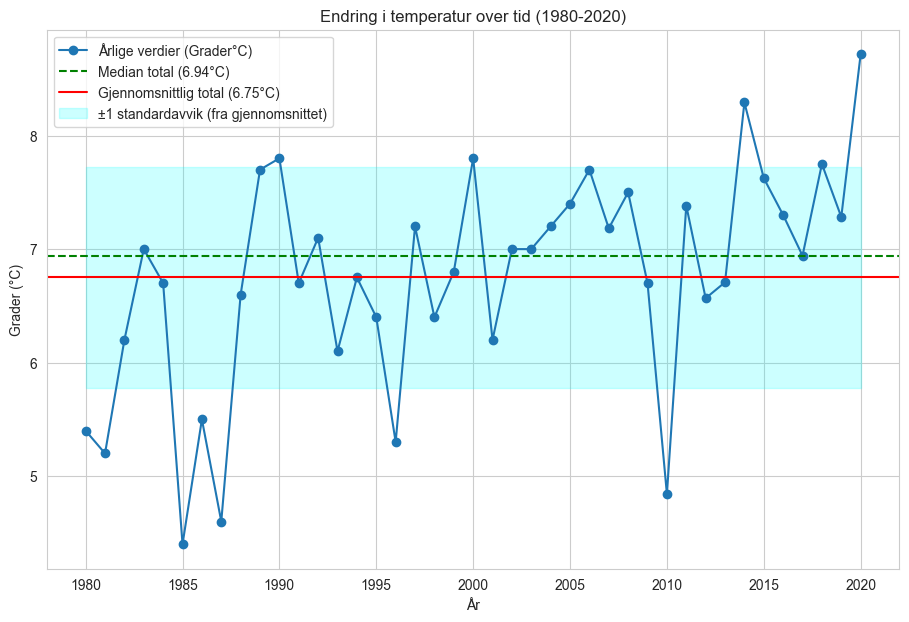

In [21]:
år = df_temp_renset["year"]
verdier = df_temp_renset["value"]
median = median_temp["Totalt"]
gjennomsnitt = gjennomsnitt_temp["Totalt"]
standardavvik = standardavvik_temp["Totalt"]

# Lager et figurvindu for visning 
plt.figure(figsize=(11, 7))

# Tegner selve diagrammet 
plt.plot(år, verdier, marker='o', label='Årlige verdier (Grader°C)')
plt.title('Endring i temperatur over tid (1980-2020)')
plt.xlabel('År')
plt.ylabel('Grader (°C)')



# Legger inn de statistiske målene med verdier i label
plt.axhline(y=median, color="green", linestyle='--', label=f"Median total ({median}°C)")
plt.axhline(y=gjennomsnitt, color="red", label=f"Gjennomsnittlig total ({gjennomsnitt}°C)")
plt.fill_between(
    år,
    gjennomsnitt - standardavvik,
    gjennomsnitt + standardavvik,
    color='cyan',
    alpha=0.2,
    label=f'±1 standardavvik (fra gjennomsnittet)'
)

# Justerer visningen av figuren 
plt.grid(True)
plt.legend()
plt.show()




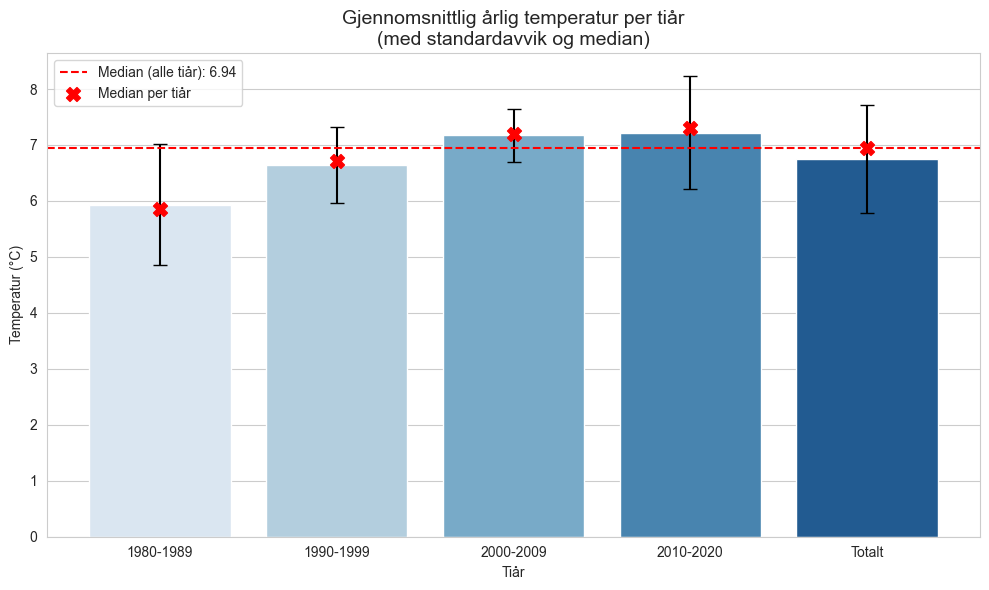

In [22]:
# Definerer dataen
intervall = gjennomsnitt_temp.keys()
gjennomsnitt = gjennomsnitt_temp.values()
median = median_temp.values()
stdavvik = standardavvik_temp.values()
 
# Lager en DataFrame
df_statistikk = pd.DataFrame({
    'Tiår': intervall,
    'Gjennomsnitt': gjennomsnitt,
    'Median': median,
    'Standardavvik': stdavvik
})

# Sett stil
sns.set_style("whitegrid")
 
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_statistikk, x='Tiår', y='Gjennomsnitt', hue='Tiår', palette='Blues')
 
# Legg til feilstolper manuelt med plt.errorbar()
for i, row in df_statistikk.iterrows():
    ax.errorbar(x=i, y=row['Gjennomsnitt'], yerr=row['Standardavvik'], fmt='none', c='black', capsize=5)
 
# Legg til horisontal linje for medianen av hele perioden
median_all_years = df_statistikk['Median'].median()  # Beregn medianen for hele datasettet
plt.axhline(median_all_years, color='red', linestyle='--', label=f"Median (alle tiår): {median_all_years}")
 
# Legg til medianen for hvert tiår som kryss
ax.scatter(df_statistikk.index, df_statistikk['Median'], color='red', zorder=5, label="Median per tiår", s=100, marker='X')
 
# Legger til etiketter og tittel
plt.xlabel('Tiår')
plt.ylabel('Temperatur (°C)')
plt.title("Gjennomsnittlig årlig temperatur per tiår\n(med standardavvik og median)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()
 

# Lagrer viktige variabler i med %store for å bruke videre

In [23]:
# lager variablene for en samlet visualisering

%store df_temp_renset
%store gjennomsnitt_temp
%store standardavvik_temp
%store median_temp

Stored 'df_temp_renset' (DataFrame)
Stored 'gjennomsnitt_temp' (dict)
Stored 'standardavvik_temp' (dict)
Stored 'median_temp' (dict)


# Prediktiv analyse

In [25]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from prediktiv_analyse import TrendModel

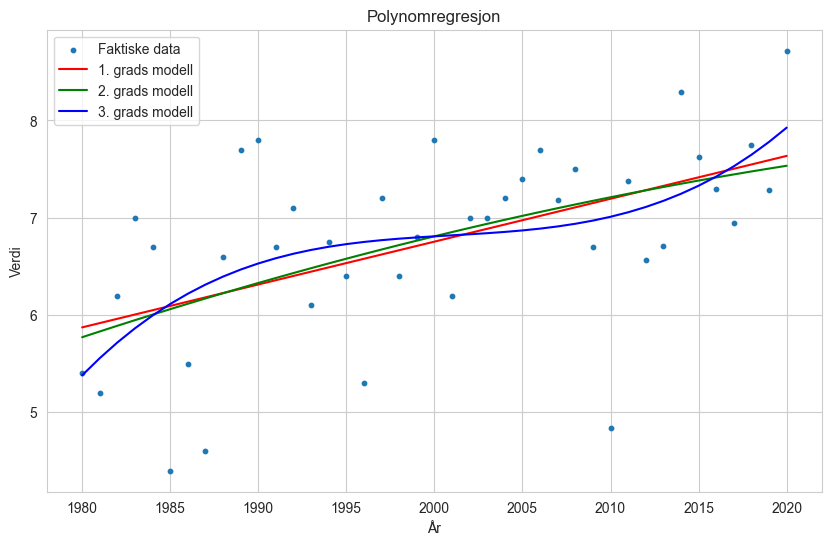

R²-scorer for modellene:
  1. grads modell: 0.2937
  2. grads modell: 0.2962
  3. grads modell: 0.3280


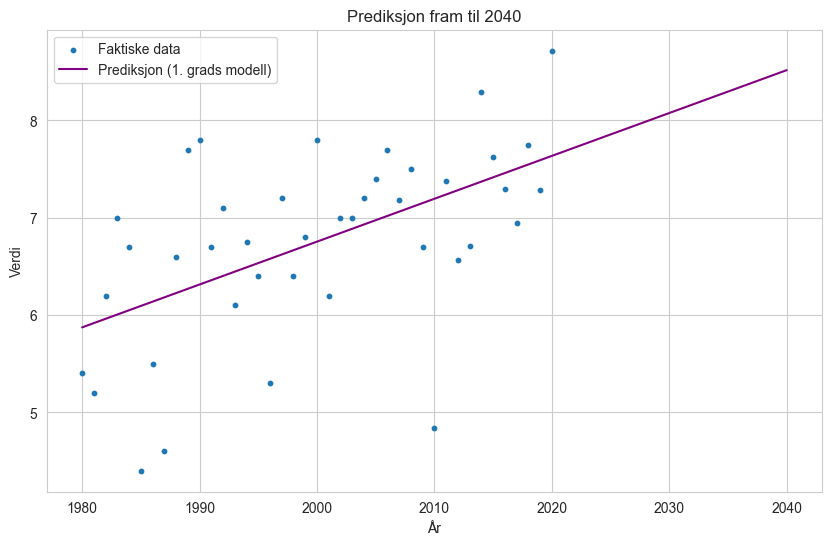

In [26]:
temp_model = TrendModel(df_temp_renset)
temp_model.fit_models()
temp_model.plot_models()
temp_model.print_r2_scores()
temp_model.plot_prediction(2040, deg=1)
